In [4]:
# import packages

from __future__ import annotations

import numpy as np
import pandas as pd
from pathlib import Path
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# set up base directory

data = pd.read_csv("../data/output/total_data.csv")

/tmp/ipykernel_2035332/3394398420.py:3: DtypeWarning: Columns (44,60) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/output/total_data.csv")


In [6]:
data1 = pd.read_csv("../data/output/data-2018.csv")

In [7]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [8]:
data1.columns

Index(['contractid', 'planid', 'fips', 'year', 'n_nonmiss', 'avg_enrollment',
       'sd_enrollment', 'min_enrollment', 'max_enrollment', 'first_enrollment',
       'last_enrollment', 'state', 'county', 'org_type', 'plan_type', 'partd',
       'snp', 'eghp', 'org_name', 'org_marketing_name', 'plan_name',
       'parent_org', 'contract_date', 'state_long', 'county_long', 'year_pen',
       'n_elig', 'n_enrol', 'avg_eligibles', 'sd_eligibles', 'min_eligibles',
       'max_eligibles', 'first_eligibles', 'last_eligibles', 'avg_enrolled',
       'sd_enrolled', 'min_enrolled', 'max_enrolled', 'first_enrolled',
       'last_enrolled', 'ssa', 'state_name', 'state_land', 'premium',
       'premium_partc', 'premium_partd_basic', 'premium_partd_supp',
       'premium_partd_total', 'partd_deductible', 'year_land',
       'riskscore_partc', 'payment_partc', 'rebate_partc', 'year_reb',
       'payment_partd', 'directsubsidy_partd', 'reinsurance_partd',
       'costsharing_partd', 'riskscore_partd', 

In [9]:
# observe data

data.head()

,contractid,planid,fips,year,n_nonmiss,avg_enrollment,sd_enrollment,min_enrollment,max_enrollment,first_enrollment,...,payment_partd,directsubsidy_partd,reinsurance_partd,costsharing_partd,riskscore_partd,avg_ffscost,basic_premium,bid,parta_enroll,partb_enroll
0,H0028,1.0,19103.0,2014,2,238.0,2.828427,236.0,240.0,240.0,...,NaN,NaN,NaN,NaN,NaN,6303.178628,1.0,NaN,NaN,NaN
1,H0028,1.0,19113.0,2014,2,1334.5,4.949747,1331.0,1338.0,1338.0,...,NaN,NaN,NaN,NaN,NaN,6975.172053,1.0,NaN,NaN,NaN
2,H0028,2.0,19153.0,2014,2,347.0,1.414214,346.0,348.0,346.0,...,105.11,41.05,26.97,37.09,0.910,6581.947092,0.0,806.179654,NaN,NaN
3,H0028,3.0,19155.0,2014,2,173.0,11.313708,165.0,181.0,165.0,...,110.04,43.02,29.06,37.96,0.983,7563.717474,0.0,844.788274,NaN,NaN
4,H0028,4.0,15003.0,2014,2,1019.5,20.506097,1005.0,1034.0,1034.0,...,70.39,41.78,14.45,14.16,0.829,5682.299233,0.0,861.327751,NaN,NaN


In [10]:
# understand data
data.describe()

,planid,fips,year,n_nonmiss,avg_enrollment,sd_enrollment,min_enrollment,max_enrollment,first_enrollment,last_enrollment,...,year_reb,payment_partd,directsubsidy_partd,reinsurance_partd,costsharing_partd,riskscore_partd,avg_ffscost,bid,parta_enroll,partb_enroll
count,340480.000000,340480.000000,340480.000000,340480.000000,159540.000000,156301.000000,159540.000000,159540.000000,159540.000000,159540.000000,...,305006.000000,257122.000000,257122.000000,257122.000000,257122.000000,257122.000000,218449.000000,292257.000000,64385.000000,64385.000000
mean,37.542458,30031.871358,2016.692049,0.928798,469.753199,19.115089,454.984449,484.696089,464.634085,473.359239,...,2015.819981,106.345225,26.818077,53.126907,26.400241,0.971861,8489.868254,781.838941,30251.916098,26873.431467
std,67.953767,15344.936522,1.722344,0.995021,1780.727658,575.609349,1699.133800,1987.769929,1789.531509,1866.402791,...,2.241238,39.193523,8.991191,25.049738,19.426616,0.124717,1270.392749,133.994488,62186.727033,55596.036600
min,1.000000,1001.000000,2014.000000,0.000000,11.000000,0.000000,11.000000,11.000000,11.000000,11.000000,...,2014.000000,11.540000,0.010000,0.200000,0.000000,0.556000,0.000000,190.571264,12.000000,11.000000
25%,4.000000,17107.000000,2015.000000,0.000000,31.000000,0.707107,30.000000,32.000000,31.000000,32.000000,...,2014.000000,81.700000,19.760000,36.260000,13.820000,0.892000,7672.174443,705.693359,2962.000000,2750.000000
50%,17.000000,29181.000000,2017.000000,0.000000,88.500000,2.121320,86.000000,91.000000,87.000000,90.000000,...,2014.000000,100.750000,25.760000,49.910000,23.000000,0.967000,8341.097659,773.939138,8663.000000,7989.000000
75%,48.000000,42095.000000,2018.000000,2.000000,294.500000,5.656854,286.000000,301.000000,290.000000,297.000000,...,2018.000000,123.450000,34.390000,65.570000,33.920000,1.038000,9161.553351,850.186104,30841.000000,27601.000000
max,999.000000,56045.000000,2019.000000,4.000000,80582.000000,90889.776554,60428.000000,159629.000000,158960.000000,159629.000000,...,2019.000000,497.010000,70.170000,335.430000,226.840000,2.311000,15149.734152,1881.786543,576664.000000,525827.000000


In [11]:
data.columns

Index(['contractid', 'planid', 'fips', 'year', 'n_nonmiss', 'avg_enrollment',
       'sd_enrollment', 'min_enrollment', 'max_enrollment', 'first_enrollment',
       'last_enrollment', 'state', 'county', 'org_type', 'plan_type', 'partd',
       'snp', 'eghp', 'org_name', 'org_marketing_name', 'plan_name',
       'parent_org', 'contract_date', 'state_long', 'county_long', 'year_pen',
       'n_elig', 'n_enrol', 'avg_eligibles', 'sd_eligibles', 'min_eligibles',
       'max_eligibles', 'first_eligibles', 'last_eligibles', 'avg_enrolled',
       'sd_enrolled', 'min_enrolled', 'max_enrolled', 'first_enrolled',
       'last_enrolled', 'ssa', 'state_name', 'state_land', 'premium',
       'premium_partc', 'premium_partd_basic', 'premium_partd_supp',
       'premium_partd_total', 'partd_deductible', 'year_land',
       'riskscore_partc', 'payment_partc', 'rebate_partc', 'year_reb',
       'payment_partd', 'directsubsidy_partd', 'reinsurance_partd',
       'costsharing_partd', 'riskscore_partd', 

## Question 1

/tmp/ipykernel_2035332/3310980444.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_year, labels=[str(int(y)) for y in years])


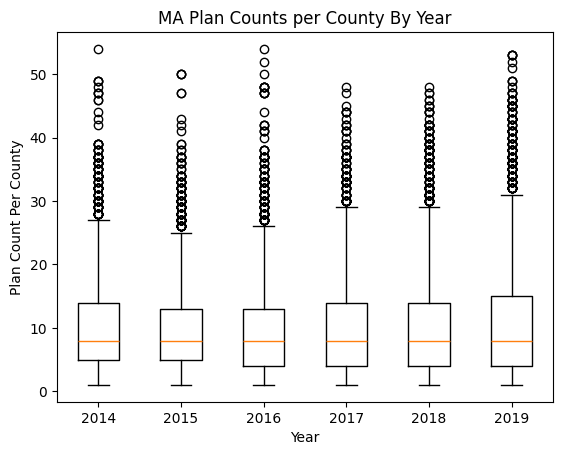

In [12]:
data["planid_num"] = pd.to_numeric(data["planid"], errors="coerce")
data["year"] = pd.to_numeric(data["year"], errors="coerce")

# Remove SNPs, 800-series, prescription only
data = data[data["snp"] != "Yes"]
data = data[~data["planid_num"].between(800, 899, inclusive="both")]
data = data[~((data["partd"] == "Yes") & (data["premium_partc"].isna()))]

# Keep valid counties and years
data["fips"] = pd.to_numeric(data["fips"], errors="coerce")
data = data[data["fips"].notna()]
data = data[data["year"].between(2014, 2019)]

# count plans
data["plan_key"] = data["contractid"].astype(str) + "-" + data["planid_num"].astype("Int64").astype(str)

plan_counts = (
    data.groupby(["year", "fips"])["plan_key"]
      .nunique()
      .reset_index(name="n_plans")
)

# create boxplot
years = sorted(plan_counts["year"].unique())
data_by_year = [
    plan_counts.loc[plan_counts["year"] == y, "n_plans"].values
    for y in years
]

plt.figure()
plt.boxplot(data_by_year, labels=[str(int(y)) for y in years])
plt.xlabel("Year")
plt.ylabel("Plan Count Per County")
plt.title("MA Plan Counts per County By Year")
plt.show()

I believe that the number of plans per county is appropriate, but should have exhibited more growth over time. Because with a median of 10 plans year after year along with no growth from 2014, 2019, consumers are left with little flexibility in the long run. However, the outliers with 30-40+ plans likely feel overwhelmed by the high number of options, making a favorable number of plans around 8-12 to ensure availability of many options without causing burdensome decision making.

## Question 2

In [13]:
from pathlib import Path
Path(".").resolve()
list(Path("..").iterdir())
list(Path("../data").iterdir())

[PosixPath('../data/output')]

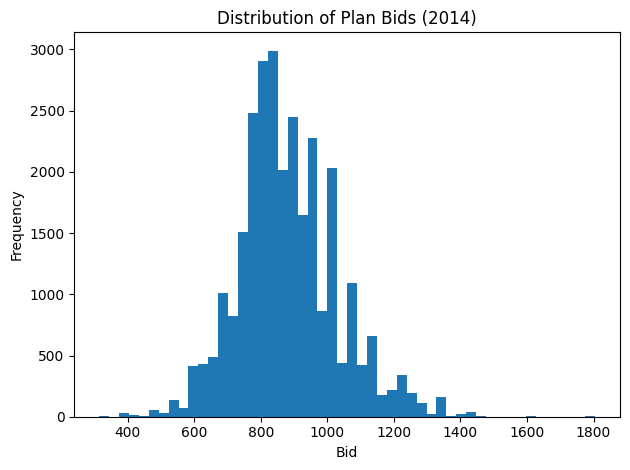

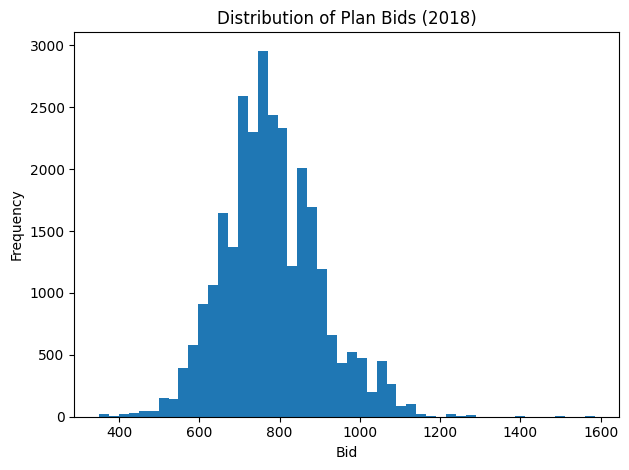

In [14]:
# risk rebate for all years

for x in ["rebate_partc", "premium", "premium_partc", "payment_partc", "riskscore_partc", "bid"]:
    if x in data.columns:
        data[x] = pd.to_numeric(data[x], errors="coerce")

# compute basic premium
data["basic_premium_recalc"] = np.where(
    data["rebate_partc"] > 0,
    0,
    np.where(
        (data["partd"] == "No") & data["premium"].notna() & data["premium_partc"].isna(),
        data["premium"],
        data["premium_partc"]
    )
)

# add bid
data["bid_recalc"] = np.nan
valid_risk = data["riskscore_partc"].notna() & (data["riskscore_partc"] != 0)

mask1 = valid_risk & (data["rebate_partc"] == 0) & (data["basic_premium_recalc"] > 0)
data.loc[mask1, "bid_recalc"] = (
    (data.loc[mask1, "payment_partc"] + data.loc[mask1, "basic_premium_recalc"])
    / data.loc[mask1, "riskscore_partc"]
)

mask2 = valid_risk & ((data["rebate_partc"] > 0) | (data["basic_premium_recalc"] == 0))
data.loc[mask2, "bid_recalc"] = (
    data.loc[mask2, "payment_partc"] / data.loc[mask2, "riskscore_partc"]
)

# create histograms for 2014 and 2018
def plot_bid_hist(df, year, bid_col="bid_recalc", bins=50):
    x = df.loc[df["year"] == year, bid_col].dropna()
    plt.figure()
    plt.hist(x, bins=bins)
    plt.title(f"Distribution of Plan Bids ({year})")
    plt.xlabel("Bid")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

plot_bid_hist(data, 2014, bid_col="bid_recalc", bins=50)
plot_bid_hist(data, 2018, bid_col="bid_recalc", bins=50)

In [15]:
# summary stats
def bid_summary(df, year, bid_col="bid_recalc"):
    x = df.loc[df["year"] == year, bid_col].dropna()
    return pd.Series({
        "n": x.shape[0],
        "mean": x.mean(),
        "median": x.median(),
        "p10": x.quantile(0.10),
        "p90": x.quantile(0.90),
        "min": x.min(),
        "max": x.max(),
        "range": x.max() - x.min(),
        "std": x.std()
    })

bid_stats = pd.DataFrame(
    [bid_summary(data, 2014), bid_summary(data, 2018)],
    index=[2014, 2018]
)
bid_stats

,n,mean,median,p10,p90,min,max,range,std
2014,28605.0,881.444860,862.614913,704.590476,1075.829847,313.924915,1805.034169,1491.109254,149.266779
2018,28450.0,780.372061,769.288175,636.505032,939.047059,350.218023,1584.731405,1234.513382,122.321988


The distribution of plan bids has become more centered over time, with the range decreasing from 1491 to 1235 and the standard deviation decreasing from 149 to 122. The number of plans have decreased slightly. The bids have also shifted to the left, with the mean decreasing from 881 to 780.

## Question 3

In [16]:
# create hhi index

# step 1: calculate sj across all counties
data['sj'] = data['avg_enrollment'] / data['avg_enrolled']

# step 2: square sj
data['sj_sq'] = data['sj']**2

# step 3: sum squared sj across all counties to produce hhi
hhi_by_year = (
    data.groupby('year')['sj_sq']
        .sum()
        .reset_index(name='hhi')
)

data = data.merge(hhi_by_year, on='year', how='left')

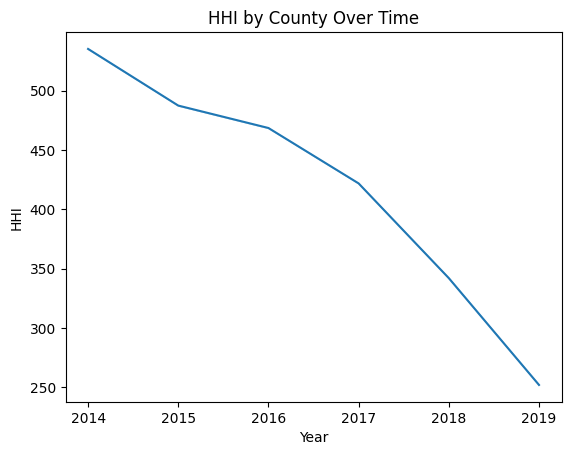

In [17]:
# plot hhi across years
sns.lineplot(data=data, x='year', y='hhi')
plt.title("HHI by County Over Time")
plt.xlabel("Year")
plt.ylabel("HHI")
plt.show()

The HHI experienced a small decrease from 2014 to 2015, plateau from 2015 to 2016, and large, steady decrease from 2015 to 2019. This trend indicates that the market has become less concentrated over time.

## Question 4

In [18]:
# calculate medicare shares
data['ma_share'] = data['n_enrol']/data['n_elig']

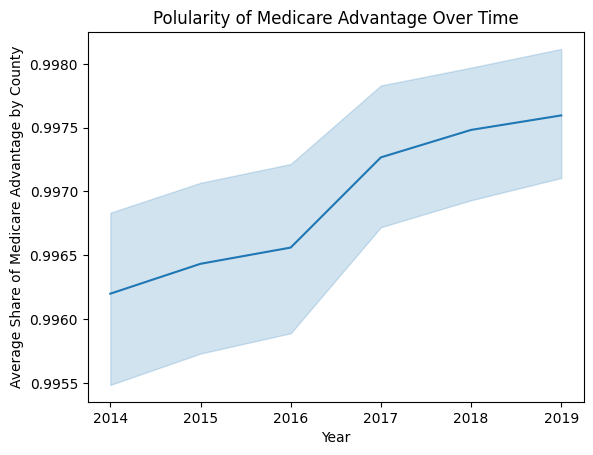

In [19]:
# plot MA shares over time
sns.lineplot(x='year', y='ma_share', data=data)
plt.title("Polularity of Medicare Advantage Over Time")
plt.xlabel("Year")
plt.ylabel("Average Share of Medicare Advantage by County")
plt.show()

Medicare has increased in popularity overall from 2014 to 2019, although the shares remained stagnant for specific years, such as 2015 to 2016 and 2018 to 2019.

## Question 5

In [20]:
# create 2018 only data set
data_2018 = data['year']==2018

data_2018 = data.loc[data['year'] == 2018].copy()

# sort hhi by percentiles
hhi_2018 = (
    data_2018.groupby("fips")["ma_share"]
    .apply(lambda x: (x**2).sum())
    .reset_index(name="hhi")
)

hhi_33 = hhi_2018["hhi"].quantile(0.33)
hhi_66 = hhi_2018["hhi"].quantile(0.66)

# define markets for 2018
def classify_market(hhi):
    if hhi <= hhi_33:
        return "competitive"
    elif hhi >= hhi_66:
        return "uncompetitive"
    else:
        return "middle"

hhi_2018["market_type"] = hhi_2018["hhi"].apply(classify_market)
data_2018 = data_2018.merge(hhi_2018, on="fips", how="left")

In [21]:
# calculate average bids for each market type
avg_bid_comp = data_2018.loc[
    data_2018["market_type"] == "competitive", "bid"
].mean()

avg_bid_unc = data_2018.loc[
    data_2018["market_type"] == "uncompetitive", "bid"
].mean()


#display answers
print(f"Competitive Market Bid: {avg_bid_comp:.2f}")
print(f"Uncompetitive Market Bid: {avg_bid_unc:.2f}")

Competitive Market Bid: 811.65
Uncompetitive Market Bid: 774.69


## Question 6

In [22]:
# split markets into quartiles

ffs_1 = data_2018["avg_ffscost"].quantile(0.25)
ffs_2 = data_2018["avg_ffscost"].quantile(0.5)
ffs_3 = data_2018["avg_ffscost"].quantile(0.75)

def ffs_quartiles(x):
    if x <= ffs_1:
        return 1
    elif x <= ffs_2:
        return 2
    elif x <= ffs_3:
        return 3
    else:
        return 4

# create table

data_2018['ffs_quartile'] = data_2018['avg_ffscost'].apply(ffs_quartiles)
data_2018['ffs_quartile'].value_counts()

pd.crosstab(data_2018['ffs_quartile'], data_2018['bid'])
quart_bids = pd.DataFrame(
    pd.crosstab(data_2018['ffs_quartile'], data_2018['bid'])
)
quart_bids

bid,350.218023,351.247637,356.595878,366.145833,368.060142,389.639924,396.218027,412.316145,412.800802,414.814080,...,1250.500835,1253.016667,1284.541779,1287.552239,1297.496206,1405.445026,1410.966608,1487.847866,1528.388350,1584.731405
ffs_quartile,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,4,0,0,0,0,...,1,3,1,5,0,0,1,4,1,6
2,0,0,0,0,0,0,0,0,0,6,...,0,0,0,6,0,0,0,0,0,0
3,1,0,0,0,3,0,0,0,0,4,...,0,1,0,2,0,3,0,1,0,0
4,3,12,3,1,0,0,2,1,5,0,...,0,0,0,2,1,2,0,0,0,0


In [23]:
data_2018['avg_ffscost'].isna().mean()


np.float64(0.00022027817987286803)

## Question 7

In [24]:
# allow r in python
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
# keep only needed columns + drop missing
# switch to r for matching
%%R

# inverse variance matching
m.nn.var <- Matching::Match(Y=lp.vars$avg_bid,
                            Tr=lp.vars$treated_dummy,
                            X=lp.covs,
                            M=4,
                            Weight=1,
                            estimand="ATE")


# mahalanobis matching
m.nn.md <- Matching::Match(Y=lp.vars$avg_bid,
                           Tr=lp.vars$treated_dummy,
                           X=lp.covs,
                           M=1,
                           Weight=2,
                           estimand="ATE")

# propensity score weighting
logit.model <- glm(treated_dummy ~ avg_eligibles + ffs_cost, family=binomial, data=lp.vars)
ps <- fitted(logit.model)
m.nn.ps <- Matching::Match(Y=lp.vars$avg_bid,
                           Tr=lp.vars$treated_dummy,
                           X=ps,
                           M=1,
                           estimand="ATE")

In [28]:
%%R
ls()


character(0)


## Question 8

The results indicate that among different treatment effect estimators, the results...

## Question 9

In [32]:
# must check ffs costs before proceeding

In [33]:
# complete 7 before moving forward

## Question 10

Working with this data was certainly a challenge for me. I learned how to patiently troubleshoot issues as they arise throughout my work on a project. The most frustrating piece of this was the amount of time the data took to merge. Further, when I realized issues with merges, I had to rerun them, which was very frustrating given the amount of time it takes.